# In this Notebook I am going to **Handle Outliers** using **IQR Methode**

## What we have to **do** -

- Importing Libreries
- Reading the CSV File
- Plotting Boxplot For Skwenes
- Statistics
- Comparing Before and After

### **Importing** Libreries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Reading** CSV File

In [6]:
path = r'/content/drive/MyDrive/Colab Notebooks/Datasets/Placement_Status2.csv'
df = pd.read_csv(path)

In [7]:
df

,degree_p,mba_p,status
0,58.00,58.80,Placed
1,77.48,66.28,Placed
2,64.00,57.80,Placed
3,100.00,58.00,Placed
4,99.00,65.00,Placed
...,...,...,...
216,77.60,74.49,Placed
217,72.00,53.62,Placed
218,73.00,69.72,Placed
219,58.00,60.23,Placed


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


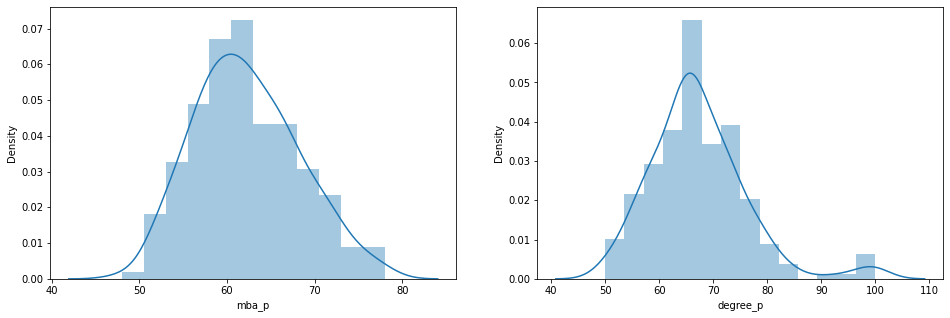

In [8]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['mba_p'])

plt.subplot(1,2,2)
sns.distplot(df['degree_p'])

plt.show()

In [9]:
df['degree_p'].describe()

count    221.000000
mean      67.247014
std        8.968666
min       50.000000
25%       61.000000
50%       66.000000
75%       72.000000
max      100.000000
Name: degree_p, dtype: float64

Plotting **Boxplot** for visualize the **Outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


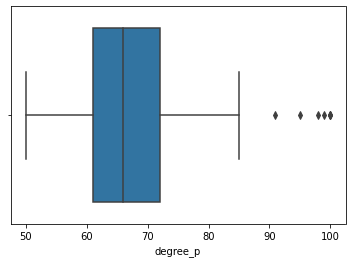

In [10]:
sns.boxplot(df['degree_p'])

### Finding **IQR**

In [12]:
percentile25 = df['degree_p'].quantile(0.25)
percentile75 = df['degree_p'].quantile(0.75)

print("Percentile 25 : ", percentile25)
print("Percentile 75 : ", percentile75)

Percentile 25 :  61.0
Percentile 75 :  72.0


In [13]:
iqr = percentile75 - percentile25
iqr

11.0

In [14]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print("Upper Limit : ", upper_limit)
print("Lower Limit : ", lower_limit)

Upper Limit :  88.5
Lower Limit :  44.5


# Now Finding **Outliers**

In [23]:
df[df['degree_p'] > upper_limit]

,degree_p,mba_p,status
3,100.0,58.00,Placed
4,99.0,65.00,Placed
5,100.0,48.00,Not Placed
14,98.0,60.00,Placed
15,95.0,78.00,Not Placed
16,100.0,60.00,Placed
203,91.0,69.71,Placed


In [24]:
df[df['degree_p'] < lower_limit]

,degree_p,mba_p,status


# **Trimming**

In [27]:
new_df = df[df['degree_p'] < upper_limit]

In [28]:
new_df.shape

(214, 3)

# Now **Comparing**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

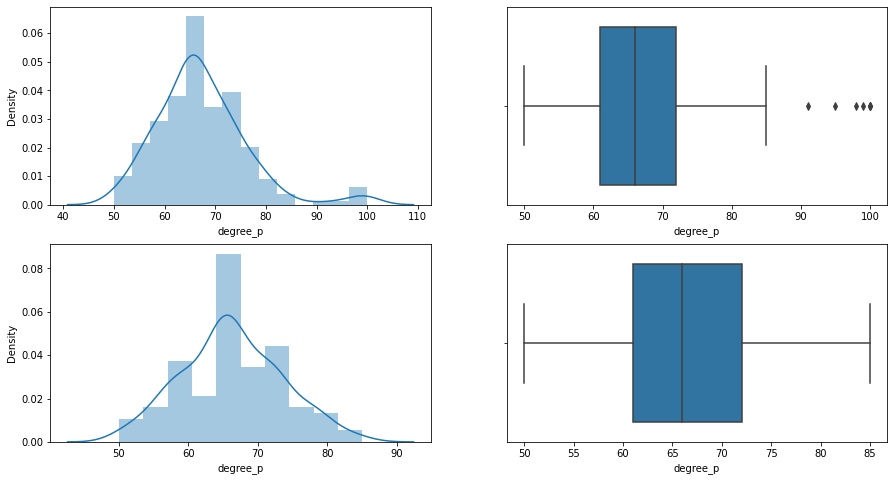

In [31]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.distplot(df['degree_p'])

plt.subplot(2,2,2)
sns.boxplot(df['degree_p'])

plt.subplot(2,2,3)
sns.distplot(new_df['degree_p'])

plt.subplot(2,2,4)
sns.boxplot(new_df['degree_p'])

plt.show()

## Now you can see **Outliers** has been removed succesfully.

# Now I will Do **Capping**

Because i don't want to loss any kind of data.

In [32]:
new_df_cap = df.copy()

new_df_cap['degree_p'] = np.where(
    new_df_cap['degree_p'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['degree_p'] < lower_limit,
        lower_limit,
        new_df_cap['degree_p']
    )
)

# Now Compare Again After Capping

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

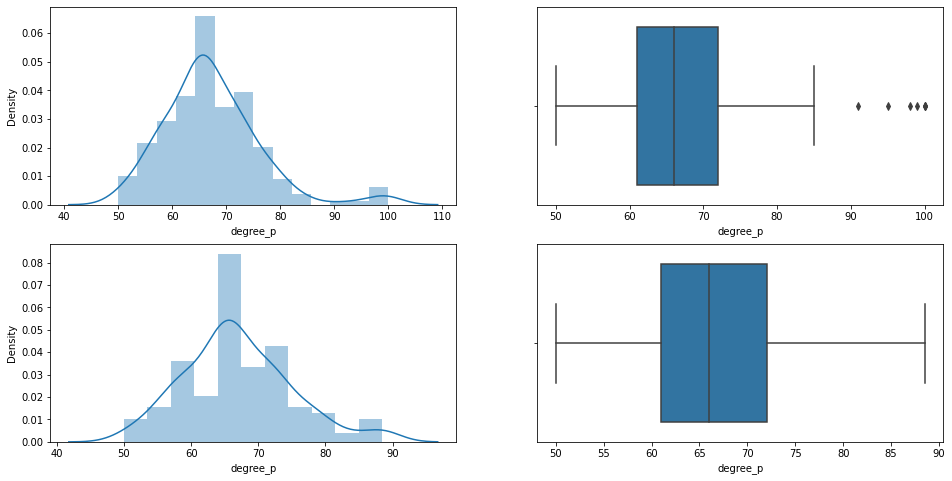

In [34]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['degree_p'])

plt.subplot(2,2,2)
sns.boxplot(df['degree_p'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['degree_p'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['degree_p'])

plt.show()

# Now we can see **Outliers** has been updated to new value widthout lossing any kind of data.